In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math

### Monte Carlo Integration

#### 1) Let integrate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a cube $x \in [-1,1], y\in [-1,1], z\in [-1,1]$

#### 2) Evaluate
$$ \iiint \limits_{C} x^2(y-1)^2(z-2)^2\exp(xyz) \; dx \; dy \; dz$$
Over a sphere of radius 1 centered at the origin.

3) Do we guarantee to get the same answer when we repeat the experiment?

4) What do we need to do to guarantee the same answer?

5) How do we defind the convergence and how fast is the convergence for monte carlo integration?

## Hill Climbing

### Biggest Triangle.
Let us consider the problem of finding the triangle with maximum area from given 500 points.

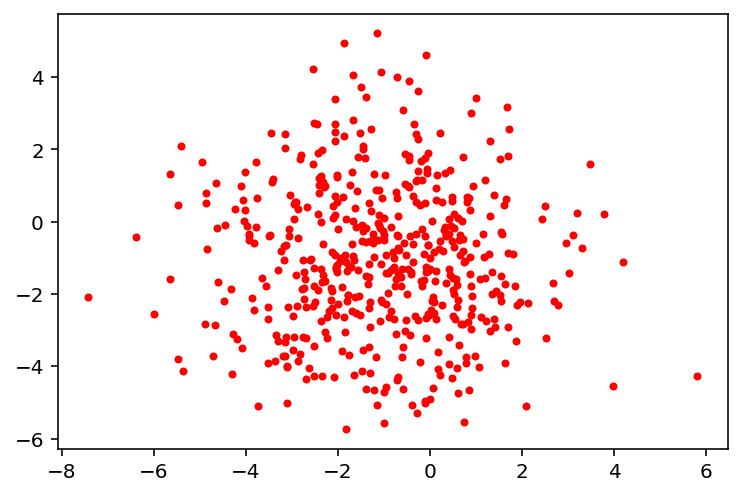

In [15]:
np.random.seed(13)
n = 500
x = np.random.randn(n)*2-1
y = np.random.randn(n)*2-1
plt.plot(x,y,'.r')

In [16]:
def triarea(x1,y1, x2,y2, x3,y3):
    #shoelace formula
    return 0.5*abs(x1*y2 + x2*y3 + x3*y1 - y1*x2 - y2*x3 - y3*x1)

def triarea2(r):
    x1,y1 = r[0]
    x2,y2 = r[1]
    x3,y3 = r[2]
    return triarea(x1,y1, x2,y2, x3,y3)


In [28]:
def mutate(answer):
    tmp = answer.copy()
    index_to_change = np.random.randint(3)
    change_to = np.random.randint(500)
    tmp[index_to_change] = change_to
    return tmp

def score(answer):
    a, b, c = answer
    return triarea(
        x[a], y[a],
        x[b], y[b],
        x[c], y[c],
    )

def hill_climbing(initial_answer, n):
    best_answer = initial_answer.copy() # copy of initial_answer
    best_score = score(best_answer) # score of initial answer
    for _ in range(n):
        new_answer = mutate(best_answer) # mutation of current answer
        new_score = score(new_answer) # score of new answer
        if new_score > best_score : #better score
            best_score = new_score
            best_answer = new_answer
    return best_answer

answer = hill_climbing(np.array([1,2,3]), 1000)

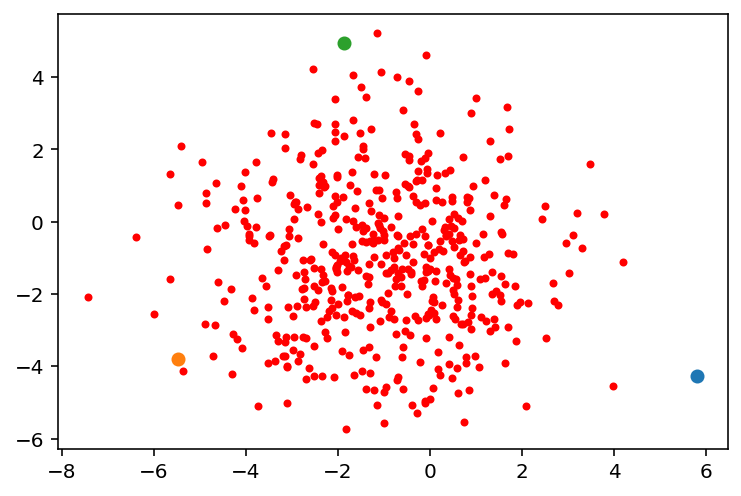

In [29]:
plt.plot(x,y,'.r')
a, b, c = answer
plt.plot(x[a], y[a], 'o')
plt.plot(x[b], y[b], 'o')
plt.plot(x[c], y[c], 'o')

### Scheduling Exam

Give classes and the intersection of students. Find a decent scheduling under 15 slot for 70 classes. Number of student taking both class `i` and class `j` can be found using `student[i][j]`.

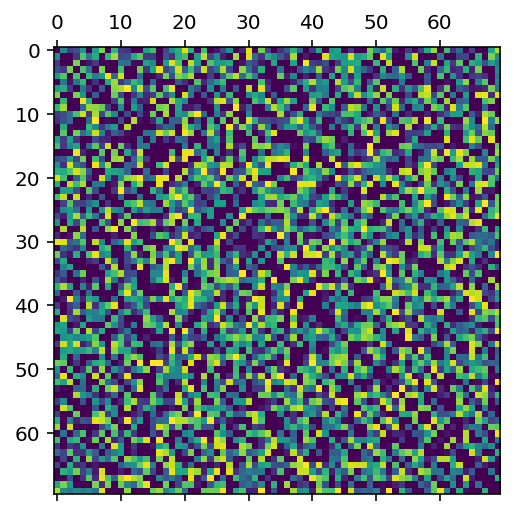

In [36]:
nclass = 70
student = np.random.randint(0,100,(nclass, nclass))

np.random.seed(222)
for i in range(nclass-1):
    for j in range(i+1,nclass):
        student[i,j] = student[j,i]

for i in range(nclass):
    student[i,i] = 0 
    
student[student>70] = 0


plt.matshow(student)

In [39]:
def mutate(answer):
    tmp = answer.copy()
    class_no = np.random.randint(70)
    change_to = np.random.randint(15)
    tmp[class_no] = change_to
    return tmp

def score(timeslots):
    complaints = 0
    for first_class in range(70):
        for second_class in range(first_class, 70):
            if timeslots[first_class] == timeslots[second_class]:
                complaints += student[first_class, second_class]
    return complaints

def hill_climbing(initial_answer, n):
    best_answer = initial_answer.copy() # copy of initial_answer
    best_score = score(best_answer) # score of initial answer
    for i in range(n):
        new_answer = mutate(best_answer) # mutation of current answer
        new_score = score(new_answer) # score of new answer
        if new_score < best_score : #better score
            best_score = new_score
            best_answer = new_answer
            print(i, best_score)
    return best_answer

answer = hill_climbing(np.array([1]*70), 20000)

0 58593
1 56781
3 55147
4 53804
5 52356
6 50857
9 49494
10 47961
11 46490
12 44929
13 43723
14 42354
15 40592
16 39053
18 37734
21 36185
22 36181
23 35016
24 33266
27 32154
28 31180
29 31120
31 30153
32 28903
33 27828
34 27768
35 26672
36 25397
37 24458
39 23446
40 22306
41 21105
42 20543
45 19672
47 19068
48 18380
50 17460
51 16701
52 16665
54 16504
56 16394
58 15691
60 14761
61 14754
63 14154
64 13197
67 12332
68 12296
71 11480
72 10933
74 10904
76 10868
78 10060
79 10002
82 9298
83 8858
85 8489
86 8033
88 7958
90 7606
94 7171
96 7105
97 7067
98 7001
100 6976
102 6951
103 6601
104 6180
105 6144
106 6136
109 5725
110 5074
111 5023
114 4913
117 4662
119 4652
123 4608
124 4438
126 4309
129 4262
132 3885
133 3552
134 3454
140 3151
142 3140
151 2838
153 2645
163 2604
165 2503
166 2436
171 2352
175 2298
177 2291
182 2170
183 2075
184 2042
195 2034
201 1922
210 1854
221 1708
246 1692
249 1612
253 1593
255 1559
259 1540
260 1450
297 1442
303 1385
304 1345
310 1334
312 1281
330 1269
333 1225


In [33]:
15**70

21202551848302519423058473919795427435467695398418896957082324661314487457275390625

## Substitution Cipher is a bad idea

### Substitution Encryption

One of the weakest encryption is called substibution encryption. Here is how it works let's supposed that my message that I want to send to you is
```
this problem is easy
```

The substition encryption works by replacing each letter using a fixed dictionary. For example, suppose my encryption key dictionary is
```python
{'a':'b', 'b':'c', 'c':'d', ...}
```
This tells that every character `a` in the message should be replaced by letter `b` in the encrypted messsage and so on.

Using the dictionary above, then the encrypted message would be
```
uijt qspcmfn jt fbtz 
```

If we know the dictionary key(which is typically agreed before sending the message), it's very easy to invert. Since `a` maps to `b` in encryption that means to decrypt it we just need to replace every `b` to `a`.

ROT13 you did in programming I is an example of substitution encryption.

In this problem we will use hill climbing to crack this encryption. That is we want to decrypt the message **without** knowing what the encryption key is. We are going to use math and some probabilities. For simplicity of this problem we will only deal with lower case letters and no punctuation except for space.

### Problem

In this problem your job is to **decrypt the msssage**.
 - The encrypted message is
```
 vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum
```

Of course you are not given the encryption key. The goal is to find the best encryption key and decrypt the message.

### What is the best key?

Since you are not given the encryption key, it seems like it is impossible to decrypt the message. However, due to probabilistic nature of natural language, it is quite easy to figure out whether a random sequence of letters the real english message or not. A good key would give a decrypt message that looks like a real english message.

For example, given the same encrypted message and you guess for two keys. The first key gives you the decrypted message of
```
i am the best
```
while the second key give you the decrypted message of
```
j bn uif cftu
```
It is quite clear the that top one is more like an English language therefore the first key is probably a better key.

To tell a computer what sequence of letter looks more like English. We can take a look at thick book and look for how frequent 2 consecutive letters(bigram) appear in the book.

For example, let's take the probability of 2 consecutive letters(bigram) to appear in an english message. The bigram `th` appears way more than `di`. So, if the encryption key that gives a lot of `th` bigram is more likely to be correct than the one that gives a lot of `di`.

Plus the fact that one character word is most likely going to be either `a` or `i`. If the key we guess put `a` or `i` in there, we are probably getting the right key.

Our method relies on the fact that some n consecutive letters(n-gram) appear more than other. Fortunately, someone wrote a program to read a huge amount of English books and count how many times n-gram appear. The file for 2-gram frequency is given in `count_2l.txt` and the file for 3-gram frequency is given in `count_3l.txt`. Source: http://norvig.com/ngrams/

To help you, I already give you a function for reading those files and convert the frequencies to score(which is a log probability). (If you want to know why, take pattern recognition.). The result is kept in dictionaries(more on next section).

### How the score works

As described in the previous section, the score should be a measure of how likely a sequence of decrpyted message to be an english message. To give an accurate score, we want to split the score in to three cases depending on the length of the word.

To give a score on a decrypted message. The score will be the sum of the score on each decrypted word.
- For word with 1 letter the score is given by looking up the dictionary `unigram_score`
- For word with 2 letters the score is given by looking up the dictionary `bigram_score`
- For word with 3 or more letters the score is given by computing the score of **every trigram**. The score of each trigram is given by the dictionary `trigram_score`. For example, the decrypted word `defts` will score
```python
trigram_score['def'] + trigram_score['eft'] + trigram_score['fts']
```
- The total score is given by the sum of score for each word in the decrypted message.

#### Note:
For dictionary lookup fail just give it score of -100). `dict.get` is your friend.

### Hint

 - Do not write this whole thing in one big function. You will just confuse yourself.
 - It should converge within a couple thousand iterations. If it doesn't, try agian, it might get stuck at local minima.

In [40]:
cipher_text = 'vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum'

In [41]:
print(cipher_text)

vxm enkv embgryjz vxrou ro vxm qnbzp r vxroi rk vxm roftrzrvl ny vxm xjefo erop vn gnbbmzfvm fzz rvk gnovmovk qm zrwm no f azfgrp rkzfop ny ruonbfogm ro vxm erpkv ny tzfgi kmfk ny royrorvl fop rv qfk onv emfov vxfv qm kxnjzp wnlfum yfb vxm kgrmogmk mfgx kvbfrorou ro rvk nqo prbmgvrno xfwm xrvxmbvn xfbemp jk zrvvzm tjv knem pfl vxm armgrou vnumvxmb ny prkkngrfvmp ionqzmpum qrzz namo ja kjgx vmbbrylrou wrkvfk ny bmfzrvl fop ny njb ybruxvyjz ankrvrno vxmbmro vxfv qm kxfzz mrvxmb un efp ybne vxm bmwmzfvrno nb yzmm ybne vxm zruxv rovn vxm amfgm fop kfymvl ny f omq pfbi fum


In [46]:
import string
import math

def load_l2score_dict():
    with open('count_2l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():########
            d[k] = math.log(d[k]/float(total))
        return d
    
def load_l3score_dict():
    with open('count_3l.txt') as f:
        total = 0
        d = {}
        for l in f:
            t, n = l.split()
            d[t] = int(n)
            total += int(n)
        for k,v in d.items():###############3
            d[k] = math.log(d[k]/float(total))
    return d
unigram_score = {x: (math.log(0.5) if x=='a' or x=='i' else -100.) for x in string.ascii_lowercase }####
bigram_score = load_l2score_dict()
trigram_score = load_l3score_dict()

In [47]:
print(unigram_score['a'])
print(bigram_score['th']) # more frequent word more score(less negative)
print(bigram_score['di']) # less frequent word less score(more negative)
print(trigram_score['thi'])

-0.6931471805599453
-3.913570062071025
-5.299868266670957
-6.110152491400357


In [67]:
def decrypt(msg, key):
    return ''.join([key.get(x, ' ') for x in msg])

def mutate(answer):
    answer_copy = {a:b for a,b in answer.items()}
    first = np.random.choice([x for x in string.ascii_lowercase])
    second = np.random.choice([x for x in string.ascii_lowercase])
    
    tmp = answer_copy[first]
    answer_copy[first] = answer_copy[second]
    answer_copy[second] = tmp
    
    return answer_copy
    
def score(key):
    decrypted = decrypt(cipher_text, key)
    score = 0
    for token in decrypted.split(' '):
        if len(token) == 1:
            score += unigram_score[token]
        elif len(token) == 2:
            score += bigram_score[token]
        else:
            score += sliding_window_score(token)
    return score

def separate_3_gram(s): # return list of 3gram
    return [s[i:i+3] for i in range(len(s)-2)]

def sliding_window_score(token):
    return sum(trigram_score[s] for s in separate_3_gram(token))

def hill_climbing(initial_answer, n):
    best_answer = initial_answer.copy() # copy of initial_answer
    best_score = score(best_answer) # score of initial answer
    for i in range(n):
        new_answer = mutate(best_answer) # mutation of current answer
        new_score = score(new_answer) # score of new answer
        if new_score > best_score : #better score
            best_score = new_score
            best_answer = new_answer
            print(i, best_score)
    return best_answer


4 -3894.811781993745
5 -3844.050497277283
6 -3775.641971096479
10 -3705.5020696714837
12 -3689.057924937296
14 -3646.6754008962034
16 -3627.141154197402
19 -3586.1175480999414
21 -3266.6413942028325
22 -3192.9871825008668
27 -3192.391892915919
28 -3021.038359865218
29 -3011.5630444754775
31 -3007.023206198131
32 -2988.7194583098053
37 -2952.1054281197794
40 -2909.045725579104
42 -2892.0922464224454
46 -2847.808629646162
48 -2828.16309186862
52 -2760.5320567092417
53 -2755.9140500337635
54 -2740.20865125701
60 -2688.9690749593346
67 -2668.0422608618646
73 -2665.0397260816217
79 -2629.6357093337347
84 -2627.5270971371824
89 -2627.1369634714324
116 -2624.4491492995826
117 -2592.1870809580264
146 -2591.394915126763
150 -2588.740007442537
162 -2583.0264327324735
170 -2578.371326920067
200 -2568.9670905528997
208 -2568.4492983880314
243 -2563.8926599343695
271 -2551.661171067085
295 -2546.917738839471
338 -2534.3869466325536
417 -2531.95319125566
522 -2528.3720138594426
532 -2500.40365425830

In [69]:
answer = hill_climbing({a:a for a in string.ascii_lowercase}, 20000)

decrypt(cipher_text, answer)

0 -3885.5954160343954
2 -3847.6397965886536
3 -3796.2599181132496
5 -3786.596570912371
8 -3721.2155800945397
9 -3591.4659109276135
11 -3551.4622721589344
12 -3505.6490456170927
13 -3343.040843129532
17 -3340.112422515405
20 -3306.149768261873
25 -3284.968752905542
35 -3274.3132629610996
41 -3253.88281452564
46 -3249.2638439868156
47 -3220.230571351973
50 -3194.7741524912585
52 -3193.589510237704
59 -3185.1055998714705
61 -3176.9392220750156
62 -3168.029389033281
65 -3145.447238150875
67 -3123.635924931892
77 -3081.3904291662366
85 -3077.7617763507733
86 -3076.5641208237334
91 -3074.642675533654
92 -2991.4105419743164
95 -2968.6411660814465
98 -2955.7180226396863
100 -2953.6264287323143
102 -2951.5169407231992
108 -2887.4099564639014
115 -2851.394217658495
165 -2804.255369591976
166 -2783.7854514534547
208 -2769.6666605706723
211 -2764.069236037153
214 -2754.8204139705335
231 -2743.905173055321
255 -2742.691697208803
284 -2739.3740416628443
291 -2690.452959186949
306 -2689.066842034826


'the most merciful thing in the world i think is the inability of the human mind to correlate all its contents we live on a placid island of ignorance in the midst of black seas of infinity and it was not meant that we should voyage far the sciences each straining in its own direction have hitherto harmed us little but some day the piecing together of dissociated knowledge will open up such terrifying vistas of reality and of our frightful position therein that we shall either go mad from the revelation or flee from the light into the peace and safety of a new dark age'

In [58]:
np.random.choice([x for x in string.ascii_lowercase])

'l'

In [61]:
cipher_text.split(' ')

['vxm',
 'enkv',
 'embgryjz',
 'vxrou',
 'ro',
 'vxm',
 'qnbzp',
 'r',
 'vxroi',
 'rk',
 'vxm',
 'roftrzrvl',
 'ny',
 'vxm',
 'xjefo',
 'erop',
 'vn',
 'gnbbmzfvm',
 'fzz',
 'rvk',
 'gnovmovk',
 'qm',
 'zrwm',
 'no',
 'f',
 'azfgrp',
 'rkzfop',
 'ny',
 'ruonbfogm',
 'ro',
 'vxm',
 'erpkv',
 'ny',
 'tzfgi',
 'kmfk',
 'ny',
 'royrorvl',
 'fop',
 'rv',
 'qfk',
 'onv',
 'emfov',
 'vxfv',
 'qm',
 'kxnjzp',
 'wnlfum',
 'yfb',
 'vxm',
 'kgrmogmk',
 'mfgx',
 'kvbfrorou',
 'ro',
 'rvk',
 'nqo',
 'prbmgvrno',
 'xfwm',
 'xrvxmbvn',
 'xfbemp',
 'jk',
 'zrvvzm',
 'tjv',
 'knem',
 'pfl',
 'vxm',
 'armgrou',
 'vnumvxmb',
 'ny',
 'prkkngrfvmp',
 'ionqzmpum',
 'qrzz',
 'namo',
 'ja',
 'kjgx',
 'vmbbrylrou',
 'wrkvfk',
 'ny',
 'bmfzrvl',
 'fop',
 'ny',
 'njb',
 'ybruxvyjz',
 'ankrvrno',
 'vxmbmro',
 'vxfv',
 'qm',
 'kxfzz',
 'mrvxmb',
 'un',
 'efp',
 'ybne',
 'vxm',
 'bmwmzfvrno',
 'nb',
 'yzmm',
 'ybne',
 'vxm',
 'zruxv',
 'rovn',
 'vxm',
 'amfgm',
 'fop',
 'kfymvl',
 'ny',
 'f',
 'omq',
 'pfbi',
 'fum

In [60]:
mutate({a:a for a in string.ascii_lowercase})

{'a': 'a',
 'b': 'b',
 'c': 'c',
 'd': 'd',
 'e': 'e',
 'f': 'f',
 'g': 'g',
 'h': 'h',
 'i': 'i',
 'j': 'j',
 'k': 'k',
 'l': 'l',
 'm': 'y',
 'n': 'n',
 'o': 'o',
 'p': 'p',
 'q': 'q',
 'r': 'r',
 's': 's',
 't': 't',
 'u': 'u',
 'v': 'v',
 'w': 'w',
 'x': 'x',
 'y': 'm',
 'z': 'z'}